# Creating secondary cost matrices for TSPTW

In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json

from random import shuffle
from search_spaces.tsptw_node import parse_file

path = "../data/tsptw/SolomonTSPTW/"


In [2]:

import pickle

list_files = [e for e in os.listdir(path) if not e.startswith('.')]
for file in list_files:
    with open(path + file, 'r', encoding="utf-8") as f:
        n_cities = int(f.readline())
        random_order = list(range(n_cities))
        shuffle(random_order)
        matrix, data = parse_file(path + file)
        secondary_cost = np.zeros((n_cities, n_cities))

        ## Create fake coordinates
        coordinates = {}
        for i in range(n_cities):
            coordinates[i] = (np.random.randint(0, 30), np.random.randint(0, 30))

        for i in range(n_cities):
            for j in range(n_cities):
                secondary_cost[i, j] = np.sqrt((coordinates[i][0] - coordinates[j][0]) ** 2 + (coordinates[i][1] - coordinates[j][1]) ** 2)


        # secondary_cost = np.random.randint(low=np.min(matrix), high=np.max(matrix), size=matrix.shape, dtype="int64")
        secondary_cost *= 1-np.eye(n_cities, dtype="int64")
        secondary_cost += secondary_cost.T
        with open(f"../data/tsptw/SecondaryCost/coordinates_{file[:-4]}.pickle", "wb") as f:
            pickle.dump(coordinates, f)
        np.save(f"../data/tsptw/SecondaryCost/{file[:-4]}.npy", secondary_cost)

Text(0.5, 0.98, 'rc_204.2')

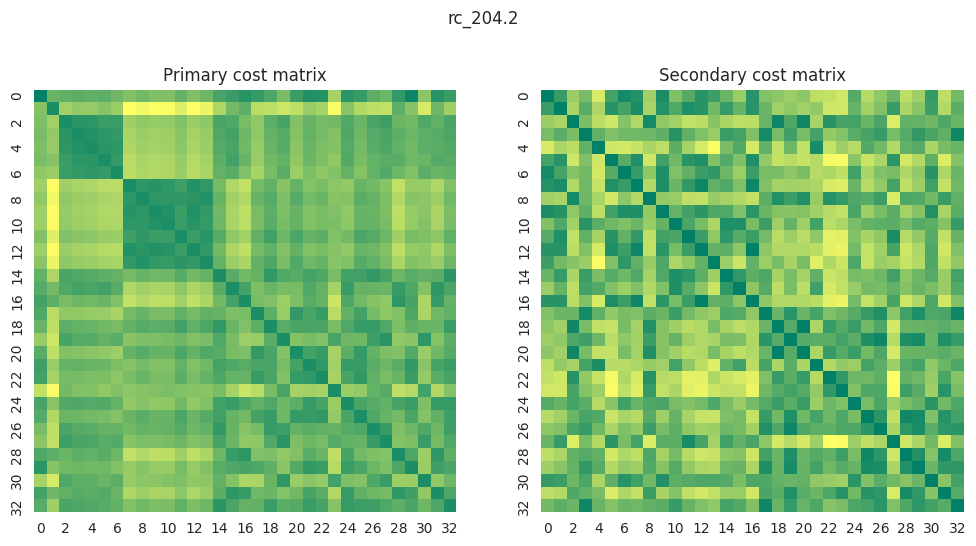

In [10]:
file = "rc_204.2"
matrix, data = parse_file(path + file + ".txt")
secondary_matrix = np.load(f"../data/tsptw/SecondaryCost/{file}.npy")

f, ax = plt.subplots(1,2, figsize=(12, 6))
sns.heatmap(matrix, ax=ax[0], cmap="summer", square=True, cbar=False)
ax[0].set_title("Primary cost matrix")
sns.heatmap(secondary_matrix, ax=ax[1], cmap="summer", square=True, cbar=False)
ax[1].set_title("Secondary cost matrix")

f.suptitle(file)